In [1]:
import tensorflow as tf

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
# data loading using tensorflow
ds = tfds.load('cifar10', split='train')




Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteAL7S6R/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteAL7S6R/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [2]:
# this code is needed to continuously obtain data from the dataset
ds.as_numpy_iterator().next()['label']
# An iterator in programming is an object that provides sequential access to the elements of a collection or sequence of data.

# it converts a TensorFlow dataset object into an iterator that returns the dataset elements as NumPy arrays.

# next(): The next() function is called on this iterator to get the next element.
# In this case, it will be the next element (for example, one batch) from your data set.

7

In [3]:
# iterator initialization
dataiterator = ds.as_numpy_iterator()

In [4]:
# in each loop it will return a new image encrypted in code

dataiterator.next()['image']



array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212, 177, 147],
        [219, 185, 155],
        [221, 187, 157]]

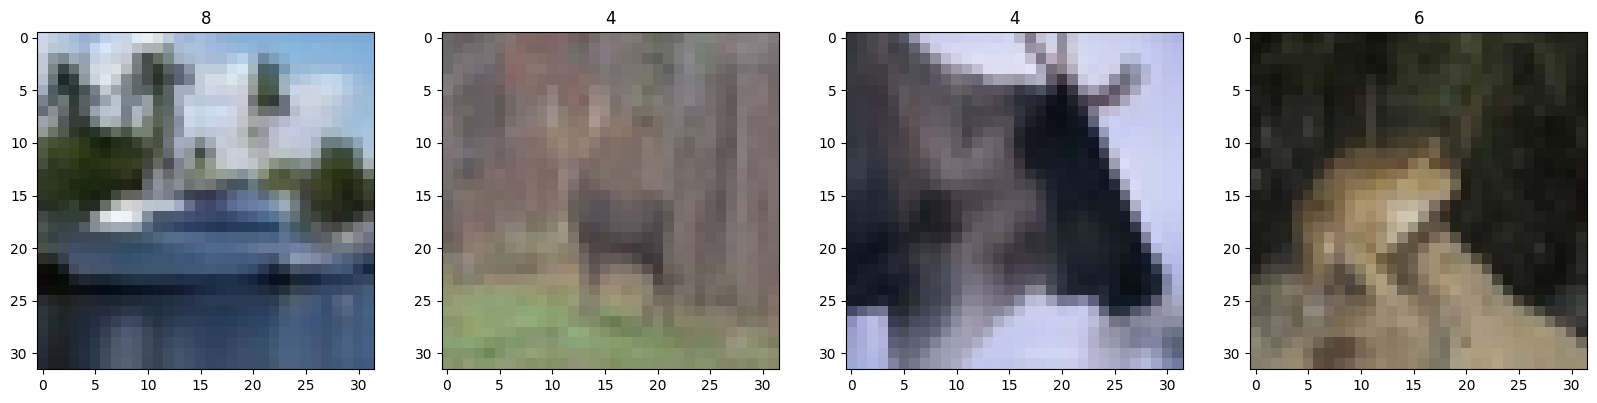

In [5]:
# outputting the first 4 images from the dataset (ncols and 4 in for idx in range are interrelated)

# output format
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
  sample = dataiterator.next()

  # image output using axis
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [6]:
# resizing and returning images

def scale_images(data):
  image = data['image']
  return image / 255

In [7]:
# some basic operations with CIFAR-10

ds = tfds.load('cifar10', split='train')
# split='train'indicates that we want to load the training portion of the dataset.



ds = ds.map(scale_images)
# Applies the scale_images function to each element of the dataset. This function probably does scaling of the pixel values ​​of the images.

ds = ds.cache()
# ds = ds.cache(): Caches the data set, which can speed up subsequent iterations over it, especially when used in a training pipeline.
ds = ds.shuffle(60000)
# ds = ds.shuffle(60000): shuffles dataset elements

ds = ds.batch(128)
# Groups the elements of the data set into batches of 128.

ds = ds.prefetch(64)
# Allows to preload the next batch of data into memory,
# while the current batch is used for training.

In [8]:
# Обновленная функция для преобразования изображения в оттенки серого без использования меток
def rgb_to_gray(image):
    # Преобразование RGB-изображения в оттенки серого
    gray_image = tf.image.rgb_to_grayscale(image)
    return gray_image

# Применение преобразования к датасету

ds = ds.map(rgb_to_gray)

In [9]:
# dataset current size output
ds.as_numpy_iterator().next().shape

(128, 32, 32, 1)

In [10]:
# GAN building

# generatot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, Dropout, LeakyReLU, UpSampling2D

In [11]:
def build_generator():
  model = Sequential()

# 128 - randon values of latent space
# 7X7 - image size
  model.add(Dense(8*8*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((8, 8, 128)))



  # LeakyReLU: This is an activation function that adds a small leakage for negative values ​​to avoid "dead neurons" in the network. Here the 0.2 parameter specifies how strong the leakage will be for negative values.

  model.add(UpSampling2D())

  # 1st convolution layer
  # 5 - kernel size
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

 # 2nd convolution layer
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  #
  # layer to get a one-dimensional input vector
  # 1 - input vector size
  # 4 - kernel size
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))






  return model

In [12]:
# model structure output
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              1056768   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                        

In [13]:
# generator prediction output
img = generator.predict(np.random.randn(4, 128, 1))
img

1/1 [==============================] - 1s 572ms/step


array([[[[0.5083003 ],
         [0.5090933 ],
         [0.51164675],
         ...,
         [0.5043544 ],
         [0.4972489 ],
         [0.4968179 ]],

        [[0.5102418 ],
         [0.5136613 ],
         [0.5162742 ],
         ...,
         [0.5085023 ],
         [0.49931362],
         [0.49979493]],

        [[0.5120243 ],
         [0.5138476 ],
         [0.51794344],
         ...,
         [0.5064802 ],
         [0.49778876],
         [0.49969628]],

        ...,

        [[0.5125748 ],
         [0.5182853 ],
         [0.5215648 ],
         ...,
         [0.50841326],
         [0.50412965],
         [0.5038941 ]],

        [[0.5055609 ],
         [0.50975215],
         [0.50715727],
         ...,
         [0.50912184],
         [0.50679624],
         [0.5018233 ]],

        [[0.50574523],
         [0.5075916 ],
         [0.50870925],
         ...,
         [0.50676376],
         [0.50686944],
         [0.50283927]]],


       [[[0.51328003],
         [0.5063418 ],
         [0.51

In [14]:
# this code generates 4 iamges
img = generator.predict(np.random.randn(4, 128, 1))

1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 63ms/step


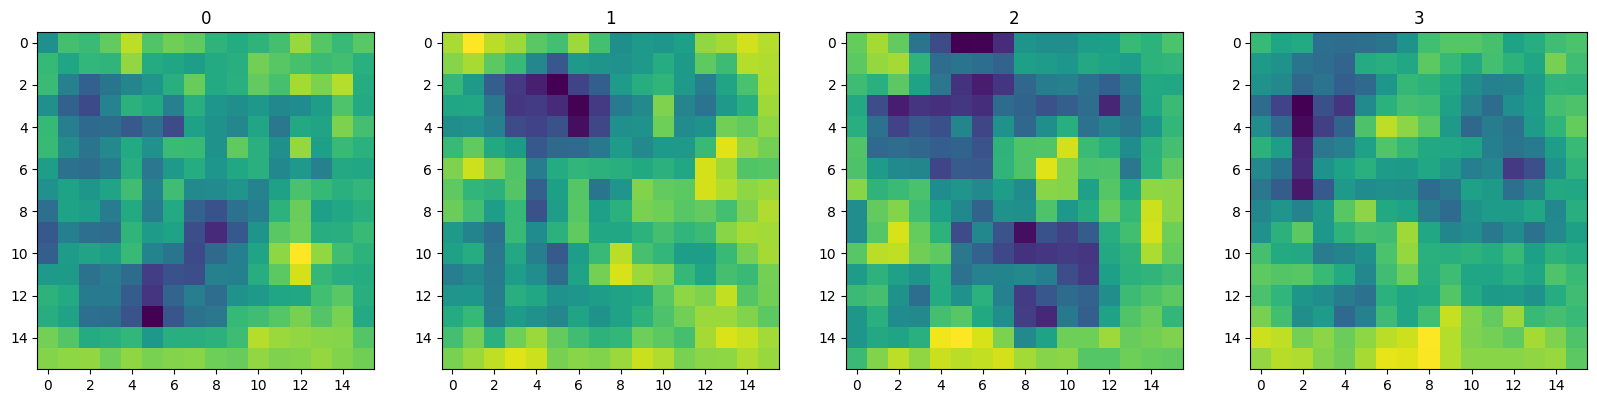

In [179]:
# code for image output
# if discriminator prediction doesn't work, don't run this code


# during each cycle of work the code will return new images
img = generator.predict(np.random.randn(4, 128, 1))

# copy the script with the output of the first values ​​from the test sample

# visualize 4 images created by the generator

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# This code creates a figure and axes for multiple subplots. In this case, ncols=4 means there will be 4 columns (graphics per row),
# and figsize=(20, 20)


for idx, img in enumerate(img):
# enumerate is a built-in function in Python that accepts an iterable object (such as a list, tuple, string, etc.)
# and returns an enumerator object. This object generates index and corresponding element pairs from the original iterable object.



# enumerate(img): This function creates tuples containing (index, value) pairs for each element in img.
# The idx variable gets the index of the element, and img gets the image itself.

# output image using axis (subgraph)
  ax[idx].imshow(np.squeeze(img))

 # update 'label' as graphs
  ax[idx].title.set_text(idx)

In [15]:
# discriminator creating

# the generator reduced the iso-constant convolution, which explains their poor quality
# the discriminator will bring them to normal size



def build_discriminator():
  model = Sequential()
  # convolutional layer
  # 32 - filter ammount
  # 5 - kernel size
  # input_shape - generator output values
  model.add(Conv2D(32, 5, input_shape = (32, 32, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation="sigmoid"))

  return model

In [16]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 128)      

In [17]:
# img = img[0]
# img[0] - this code outputs first image from generated

# to output images shape:
img.shape

(4, 32, 32, 1)

In [18]:
# generate forecast in numerical format
# to determine the probability with which each object will be real or generated
# a separate array will be created
# the number of arrays corresponds to the number of images

# discriminator.predict(np.expand_dims(img, 0))
discriminator.predict(img)

1/1 [==============================] - 0s 121ms/step


array([[0.49596977],
       [0.49583557],
       [0.4959571 ],
       [0.49577385]], dtype=float32)

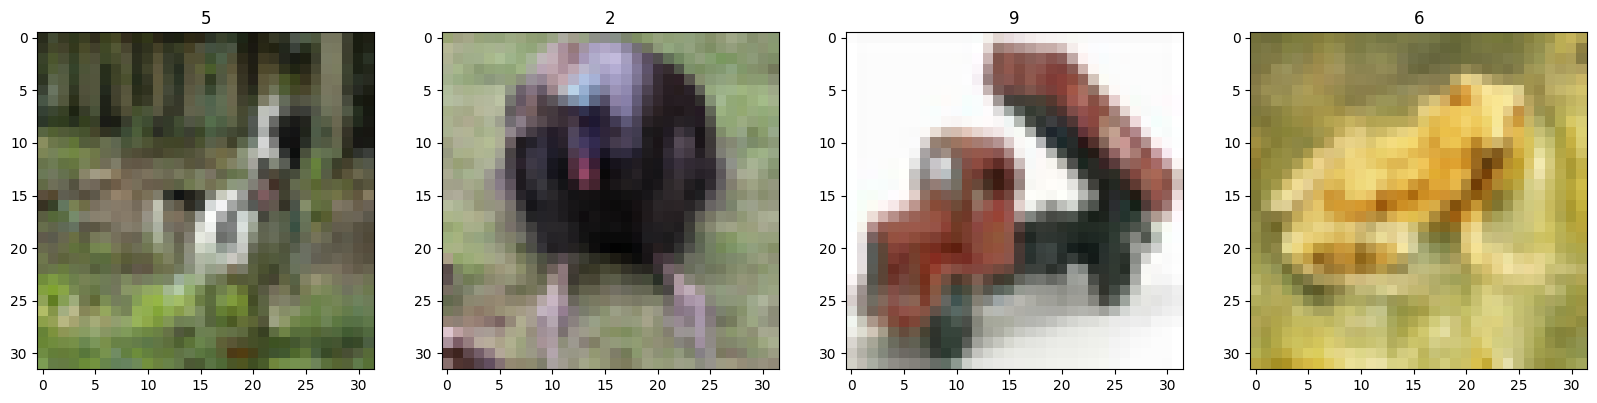

In [19]:
# updated data visualisation
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
  sample = dataiterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [20]:
# learning cycle

# GAN training is difficult to the extent that it is extremely difficult to find a balance between learning rates of discriminator and generator

# the fit function is not recommended for use in creating a GS-NN since the generator and discriminator must be trained together and at the same time

# setting up the optimizer and loss function (for the generator and discriminator)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import BinaryCrossentropy


In [21]:
gen_opt = Adamax(learning_rate=0.0001)
# The learning_rate of the discriminator should be lower so that it does not work faster than the generator
disc_opt = Adamax(learning_rate=0.00001)

gen_loss = BinaryCrossentropy()
disc_loss = BinaryCrossentropy()

In [22]:
from tensorflow.keras.models import Model
class CifarGAN(Model):

    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, gen_opt, disc_opt, gen_loss, disc_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.gen_opt = gen_opt
        self.disc_opt = disc_opt
        self.gen_loss = gen_loss
        self.disc_loss = disc_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:

            # Pass the real and fake images to the discriminator model
            real_output = self.discriminator(real_images, training=True)
            fake_output = self.discriminator(fake_images, training=True)
            total_outputs = tf.concat([real_output, fake_output], axis=0)

            # Create labels for real and fakes images
            realfake = tf.concat([tf.zeros_like(real_output), tf.ones_like(fake_output)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(real_output))
            noise_fake = -0.15*tf.random.uniform(tf.shape(fake_output))
            realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss using BINARYCROSS
            total_disc_loss = self.disc_loss(realfake, total_outputs)

        # Apply backpropagation - nn learn merhod
        disc_grad = d_tape.gradient(total_disc_loss, self.discriminator.trainable_variables)
        self.disc_opt.apply_gradients(zip(disc_grad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_gen_loss = self.gen_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        gen_grad = g_tape.gradient(total_gen_loss, self.generator.trainable_variables)
        self.gen_opt.apply_gradients(zip(gen_grad, self.generator.trainable_variables))

        return {"disc_loss":total_disc_loss, "gen_loss":total_gen_loss}

In [24]:
# model creating based on CifarGAN
cifargan = CifarGAN(generator, discriminator)

In [25]:
# model compile
cifargan.compile(gen_opt, disc_opt, gen_loss, disc_loss)

In [26]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [30]:
# class ModelMonitor is made for callback
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    # generates random values ​​in the format (x, y, 1), where num_img is x and latent_dim is y
    random_latent_vectors = tf.random.uniform((self.num_img,  self.latent_dim, 1))
    # generates an image based on random_latent_vectors
    generated_images = self.model.generator(random_latent_vectors)
    # converts an image to a visible format
    generated_images *= 255
    # convert image to numpy array
    generated_images.numpy()

    # save images to 'images' folder
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images', f"generated_img_{epoch}_{i}.png"))


In [28]:
# model training

# ds - dataset
history = cifargan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

# ETA: 4:27:25 - disc_loss: 0.6934 - gen_loss: 0.6863
# characteristic of the first cycle of the first era of training - as you can see, the training time is too long

Epoch 1/20
  1/391 [..............................] - ETA: 4:27:25 - disc_loss: 0.6934 - gen_loss: 0.6863

KeyboardInterrupt: ignored

In [ ]:
# plotting the losses of the generator and discriminator using matplotlib
plt.suptitle('Loss')
plt.plot(history.history['disc_loss'], label='disc_loss')
plt.plot(history.history['gen_loss'], label='gen_loss')
plt.legend()
plt.show()

In [ ]:
# get metric parameters from each epoch
disc_loss_values = history.history['disc_loss']
gen_loss_values = history.history['gen_loss']

# metric value output
print("Discriminator Loss:", disc_loss_values)
print("Generator Loss:", gen_loss_values)


Epoch 1/20


TypeError: ignored

In [41]:
# we may load some weight values to get better generator output
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

KeyError: ignored

In [33]:
# images generation using generator
images = generator.predict(tf.random.normal((16, 128, 1)))
images


1/1 [==============================] - 1s 757ms/step


array([[[[0.53413326],
         [0.540367  ],
         [0.5472306 ],
         ...,
         [0.5281094 ],
         [0.5066945 ],
         [0.50442564]],

        [[0.53775984],
         [0.55734473],
         [0.5658813 ],
         ...,
         [0.53896004],
         [0.5178114 ],
         [0.5088908 ]],

        [[0.54065555],
         [0.5546611 ],
         [0.572123  ],
         ...,
         [0.54075354],
         [0.5203152 ],
         [0.5120387 ]],

        ...,

        [[0.52949953],
         [0.5353883 ],
         [0.54668564],
         ...,
         [0.52677816],
         [0.5138661 ],
         [0.5043524 ]],

        [[0.51843095],
         [0.526483  ],
         [0.5241023 ],
         ...,
         [0.51610774],
         [0.51505965],
         [0.5053715 ]],

        [[0.50964236],
         [0.51244813],
         [0.5154229 ],
         ...,
         [0.51213145],
         [0.50942385],
         [0.5036439 ]]],


       [[[0.54570705],
         [0.55778545],
         [0.56

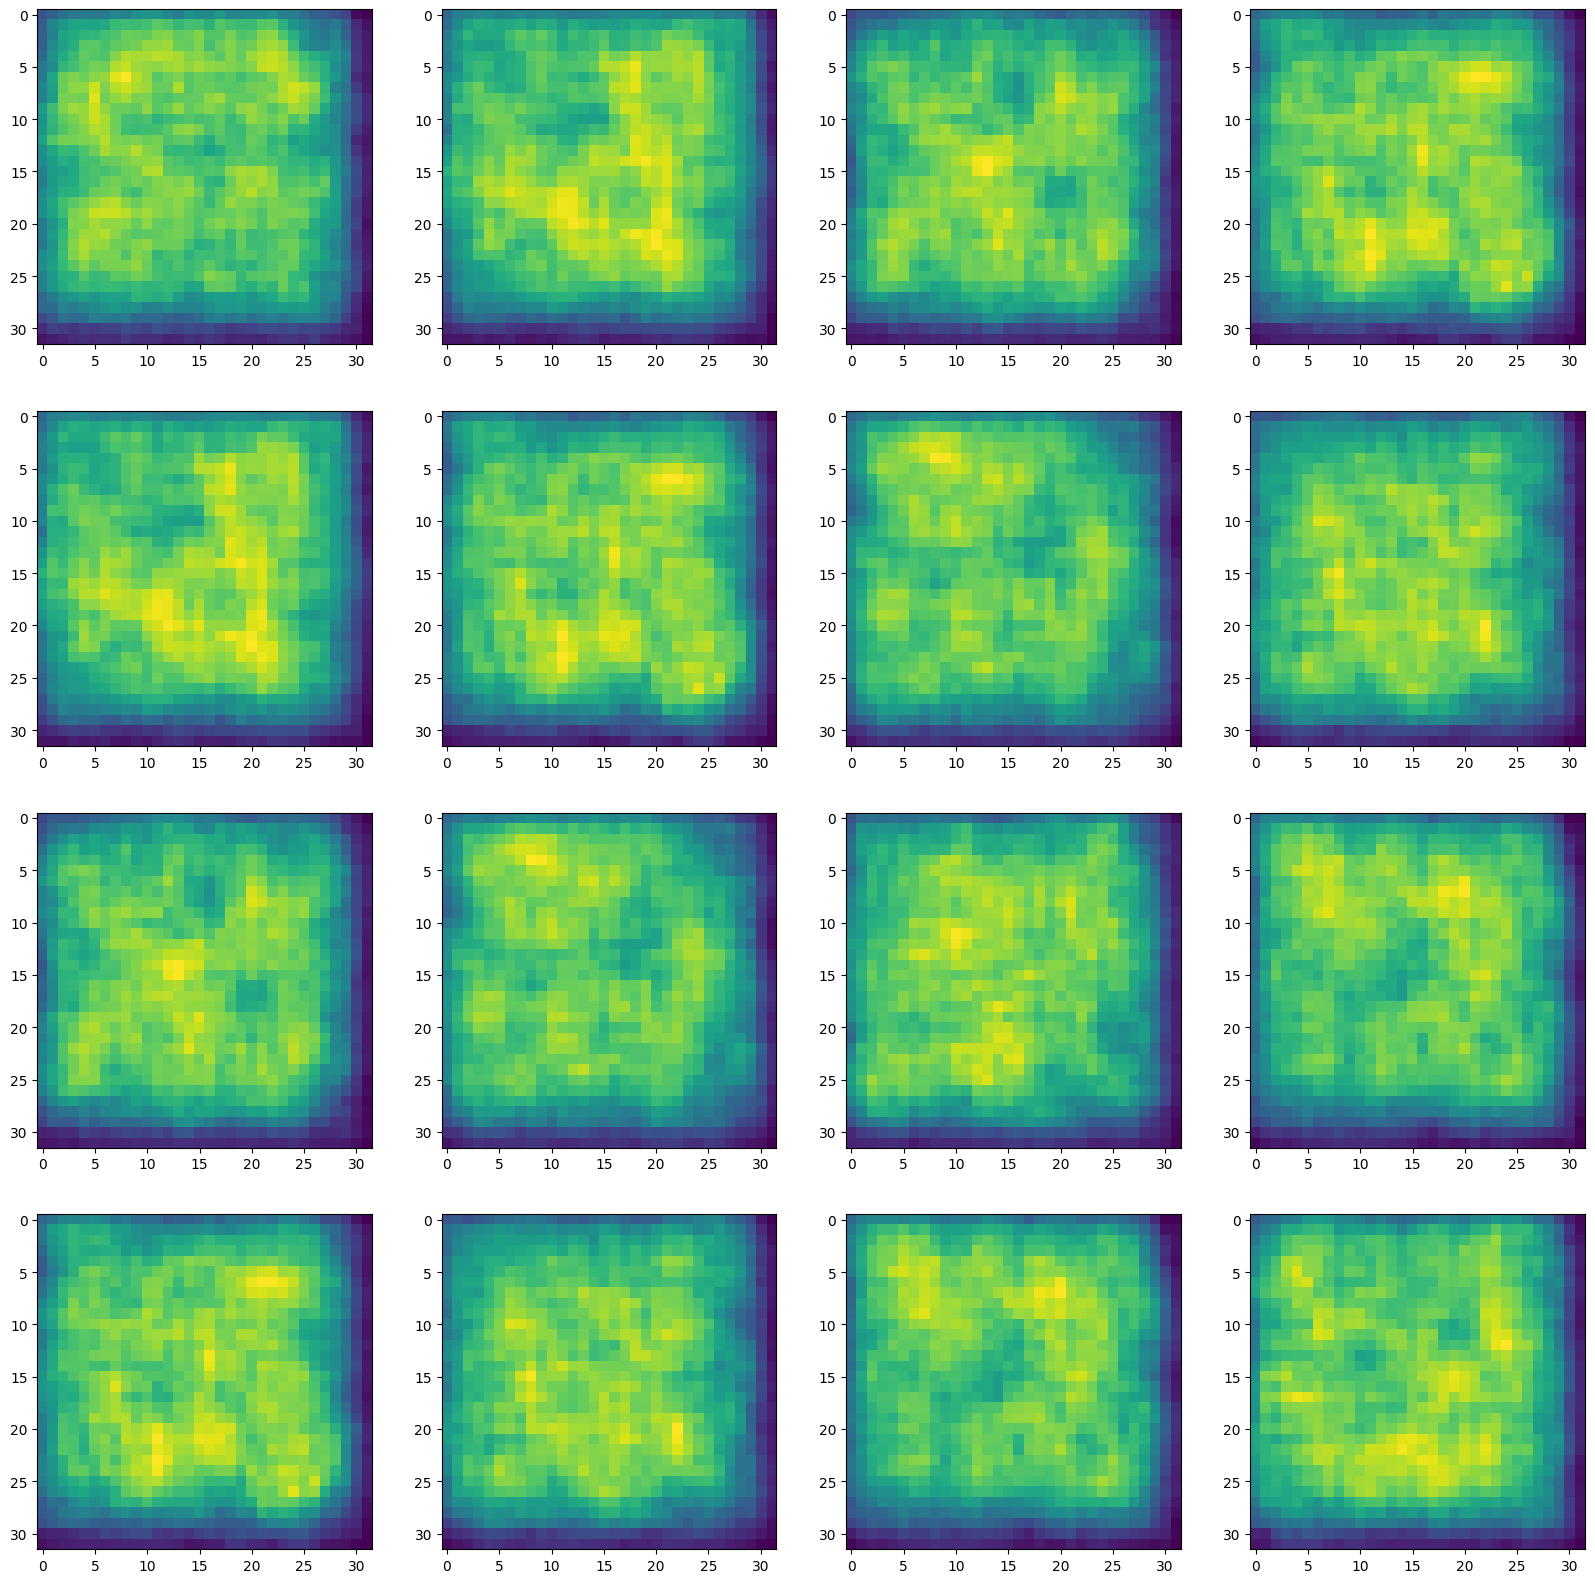

In [34]:
# This code creates a 4x4 grid of plots using the Matplotlib library. Each graph in the grid will display an image from the images list
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(images[(i+1)*(j+1)-1])
